Vessel 1 arrives at 0.3412322928093567
Vessel 1 berths at 0.3412322928093567
Vessel 1 starts unloading at 0.3412322928093567
Vessel 2 arrives at 4.389312526770837
Vessel 2 berths at 4.389312526770837
Vessel 2 starts unloading at 4.389312526770837
Vessel 3 arrives at 7.026670639114483
Vessel 4 arrives at 11.341548165822674
Vessel 5 arrives at 12.262937638506635
Vessel 6 arrives at 13.754739244741991
Vessel 7 arrives at 35.638980307715165
Vessel 8 arrives at 44.36173523324828
Vessel 9 arrives at 47.802511950097006
Vessel 10 arrives at 48.28688149403146
Vessel 11 arrives at 48.71862750349052
Vessel 12 arrives at 54.000473187782944
Vessel 13 arrives at 55.64528739834157
Vessel 14 arrives at 71.83131885223301
Vessel 15 arrives at 73.40216002242364
Vessel 16 arrives at 76.55416673432929
Vessel 17 arrives at 77.28139502555548
Vessel 18 arrives at 77.6122840410328
Vessel 19 arrives at 77.87103460647536
Vessel 20 arrives at 84.92599075954583
Vessel 21 arrives at 89.53216010289765
Vessel 22 arri

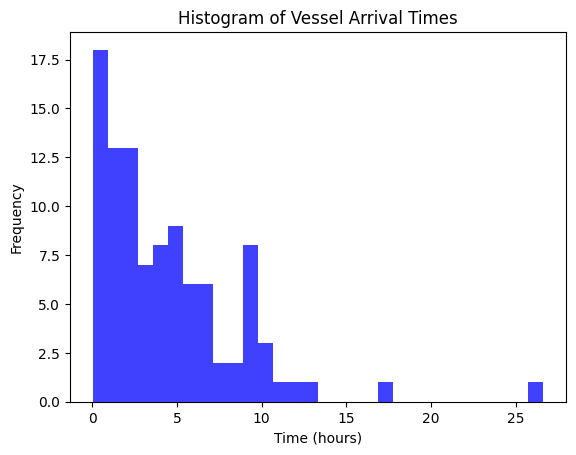

In [1]:
# Container_Terminal_Simulation.ipynb

# Import necessary libraries
import simpy
import random
import matplotlib.pyplot as plt
import numpy as np

# Define the Vessel class
class Vessel:
    def __init__(self, env, name, terminal):
        self.env = env
        self.name = name
        self.terminal = terminal
        self.containers = 150  # Each vessel carries 150 containers
        env.process(self.arrival())

    def arrival(self):
        # Vessel arrives at the terminal
        print(f'{self.name} arrives at {self.env.now}')
        with self.terminal.berth.request() as request:
            yield request
            print(f'{self.name} berths at {self.env.now}')
            yield self.env.process(self.unload())

    def unload(self):
        crane = yield self.terminal.crane.get()  # Get a crane
        print(f'{self.name} starts unloading at {self.env.now}')
        for i in range(self.containers):
            truck = yield self.terminal.truck.get()  # Get a truck
            yield self.env.timeout(3)  # 3 minutes per container to unload
            self.terminal.truck.put(truck)
        self.terminal.crane.put(crane)
        print(f'{self.name} has finished unloading at {self.env.now}')

# Define the Terminal class
class Terminal:
    def __init__(self, env):
        self.env = env
        self.berth = simpy.Resource(env, 2)  # 2 berths
        self.crane = simpy.FilterStore(env, 2)  # 2 quay cranes
        for i in range(2):
            self.crane.put(f'Crane {i+1}')
        self.truck = simpy.FilterStore(env, 3)  # 3 trucks
        for i in range(3):
            self.truck.put(f'Truck {i+1}')

# Define the vessel arrival process
def vessel_arrival(env, terminal):
    vessel_count = 0
    while True:
        yield env.timeout(random.expovariate(1/5))  # Average of 5 hours between vessel arrivals
        vessel_count += 1
        Vessel(env, f'Vessel {vessel_count}', terminal)

# Create the environment and run the simulation
env = simpy.Environment()
terminal = Terminal(env)
env.process(vessel_arrival(env, terminal))
env.run(until=200)  # Run the simulation for 200 minutes

# Optional: Visualize the vessel arrival times
times = np.random.exponential(5, 100)
plt.hist(times, bins=30, alpha=0.75, color='blue')
plt.title("Histogram of Vessel Arrival Times")
plt.xlabel("Time (hours)")
plt.ylabel("Frequency")
plt.show()
